## 对数据进行清洗和描述

### 1. 清洗错误行－检验数据是否有错行

In [148]:
with open("/Users/sophiasun/GitHub/project/tianya_exo_threads_list.txt", 'rb') as f:
    lines = f.readlines()
yes = 0
no = 0
for i in range(0,len(lines)):
    t= len(lines[i].split('\t'))
    if t !=7:
        print 'line'+str(i)+'is wrong'+str(t)
        no+=1
    else:
        yes+=1
print 'yes=',yes,',no=',no

yes= 7500 ,no= 0


In [149]:
with open("/Users/sophiasun/GitHub/project/tianya_exo_threads_author_info.txt", 'rb') as f:
    lines = f.readlines()
yes = 0
no = 0
for i in range(0,len(lines)):
    t= len(lines[i].split('\t'))
    if t !=5:
        print 'line'+str(i)+'is wrong'+str(t)
        no+=1
    else:
        yes+=1
print 'yes=',yes,',no=',no

yes= 2147 ,no= 0


In [150]:
with open("/Users/sophiasun/GitHub/project/tianya_exo_threads_network.txt", 'rb') as f:
    lines = f.readlines()

In [151]:
yes = 0
no = 0
for i in range(0,len(lines)):
    t= len(lines[i].split('\t'))
    if t !=6:
        print 'line'+str(i)+'is wrong'+str(t)
        no+=1
    else:
        yes+=1
print 'yes=',yes,',no=',no

yes= 211795 ,no= 0


### 结果：三个数据集都没有错行，数据干净

### 2. 整理数据

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [153]:
df = pd.read_csv('/Users/sophiasun/GitHub/project/tianya_exo_threads_list.txt', sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5,6
0,"台湾射飞弹炸死自己人,弯弯表示导弹射偏了还那么厉害?exo me...",/post-funinfo-6981701-1.shtml,密码你得问我要,http://www.tianya.cn/108445432,129,1,2016-07-02 12:30
1,"当年因为'吴京' 说不认识""EXO"",就去爆了'普京'吧的那支神鬼部...",/post-funinfo-6970441-1.shtml,我是说真的很认真,http://www.tianya.cn/107986208,20290,212,2016-06-23 00:24


In [154]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:5]

,title,link,author,author_page,click,reply,time
0,"台湾射飞弹炸死自己人,弯弯表示导弹射偏了还那么厉害?exo me...",/post-funinfo-6981701-1.shtml,密码你得问我要,http://www.tianya.cn/108445432,129,1,2016-07-02 12:30
1,"当年因为'吴京' 说不认识""EXO"",就去爆了'普京'吧的那支神鬼部...",/post-funinfo-6970441-1.shtml,我是说真的很认真,http://www.tianya.cn/107986208,20290,212,2016-06-23 00:24
2,看看吴亦凡在演唱会一周前跑路后exo队员经历了什么,/post-funinfo-6965514-1.shtml,不想裸奔,http://www.tianya.cn/10144816,512,5,2016-06-18 10:11
3,"神秘达人,痛快还原EXO主打作品",/post-funinfo-6964793-1.shtml,极世风,http://www.tianya.cn/112652954,334,9,2016-06-17 14:25
4,谁来爆爆exo四子的恩恩怨怨,/post-funinfo-6963861-1.shtml,sholovenino,http://www.tianya.cn/110874356,837,28,2016-06-16 17:09


In [155]:
da = pd.read_csv('/Users/sophiasun/GitHub/project/tianya_exo_threads_author_info.txt', sep = "\t", header=None)
da[:2]

,0,1,2,3,4
0,http://www.tianya.cn/108445432,10,58,56,851
1,http://www.tianya.cn/107986208,0,3,3,88


In [156]:
da=da.rename(columns = {0:'author_page', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'comment_num'})
da[:5]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/108445432,10,58,56,851
1,http://www.tianya.cn/107986208,0,3,3,88
2,http://www.tianya.cn/10144816,0,4,4,55
3,http://www.tianya.cn/112652954,0,5,30,6
4,http://www.tianya.cn/110874356,0,0,2,22


In [157]:
data = pd.concat([df,da], axis=1)
len(data)

7500

### 3. 数据描述
#### 1)基本层面

In [158]:
data.describe()

,click,reply
count,7500.000000,7500.000000
mean,4349.220000,97.360000
std,18995.687102,558.262039
min,19.000000,0.000000
25%,175.000000,1.000000
50%,483.000000,4.000000
75%,1208.000000,22.000000
max,134741.000000,3996.000000


In [160]:
import numpy as np

np.mean(data.click), np.std(data.click), np.sum(data.click)

(4349.22, 18994.420681126292, 32619150)

### 分析：从基本数据层面进行分析，点击量的平均数是大约在4349次，从3/4位点回复是1208次，从这可以看出这个数据分布的非常不平衡，有些贴子的点击量非常大，拉高了整体平均的情况很严重。另外同理可以发现，3/4位点的回帖数只有22，但是由于极少部分的帖子的回帖量很大，左右拉高了整体的回帖数，回帖量仍然分布不平均。
### 从这部分对于点击量的数据可以看到关于EXO的帖子的点击量接近3261万。

In [161]:
d1 = sm.stats.DescrStatsW(data.click, weights=[1 for i in data.click])
d1.mean, d1.var, d1.std, d1.sum

(4349.2200000000003, 360788017.01160008, 18994.420681126343, 32619150.0)

In [162]:
d1 = sm.stats.DescrStatsW(data.click, weights=data.reply)
d1.mean, d1.var, d1.std, d1.sum

(112273.33360723089, 2324686644.9026752, 48215.004354481556, 81981988200.0)

In [163]:
np.median(data.click)

483.0

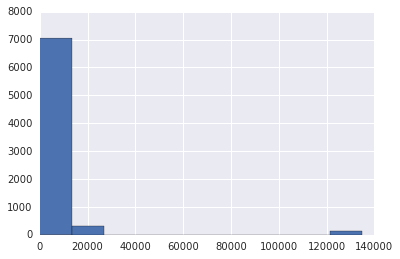

In [164]:
plt.hist(data.click)
plt.show()

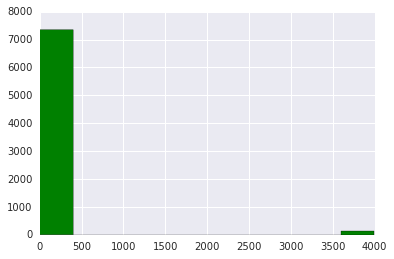

In [165]:
plt.hist(data.reply, color = 'green')
plt.show()

### 分析：从这个图可以看出，点击量在0-20000之间的占据整体数据的绝大多数超过7000条，同样回帖数在0-500的已经占据了7000条。而点击量和回帖数超过这个热度的只有极少数帖子。

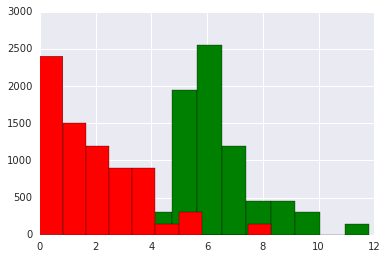

In [166]:
plt.hist(np.log(data.click+1), color='green')
plt.hist(np.log(data.reply+1), color='red')
plt.show()

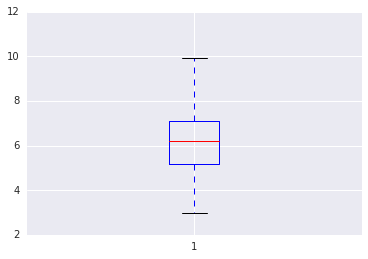

In [167]:
plt.boxplot([np.log(data.click+1)])
plt.show()

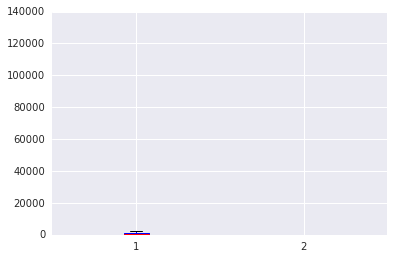

In [168]:
plt.boxplot([data.click, data.reply])
plt.show()

In [180]:
def transformData(dat):
    results = []
    for i in dat:
        try:
            results.append(int(i))
        except:
            print i 
            results.append(0)
    return results

In [181]:
data.fans_num = transformData(data.fans_num)
data.followed_num = transformData(data.followed_num )
data.post_num = transformData(data.post_num )
data.comment_num = transformData(data.comment_num )

In [182]:
print data.fans_num

0       58
1        3
2        4
3        5
4        0
5        0
6       10
7        0
8        0
9        7
10       2
11       1
12       0
13       0
14       0
15       1
16       6
17       0
18       0
19       0
20      35
21       0
22       7
23       0
24       2
25       5
26       0
27       0
28       0
29       1
        ..
7470     0
7471     0
7472     0
7473     0
7474     0
7475     0
7476     0
7477     0
7478     0
7479     0
7480     0
7481     0
7482     0
7483     0
7484     0
7485     0
7486     0
7487     0
7488     0
7489     0
7490     0
7491     0
7492     0
7493     0
7494     0
7495     0
7496     0
7497     0
7498     0
7499     0
Name: fans_num, dtype: int64


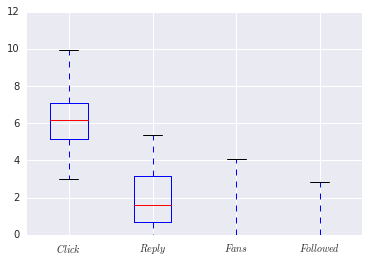

In [183]:
plt.boxplot([np.log(data.click+1), np.log(data.reply+1), 
             np.log(data.fans_num+1), np.log(data.followed_num + 1)], 
            labels = ['$Click$', '$Reply$', '$Fans$', '$Followed$'])
plt.show()

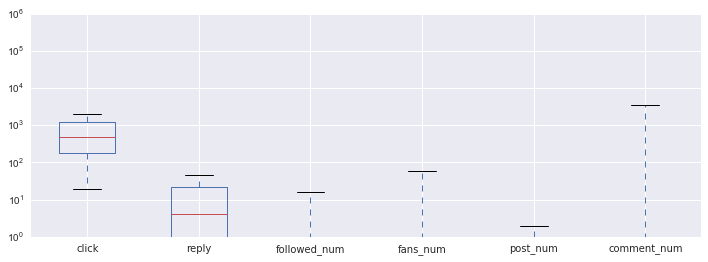

In [184]:
fig = plt.figure(figsize=(12,4))
data.boxplot(return_type='dict')
plt.yscale('log')
plt.show()

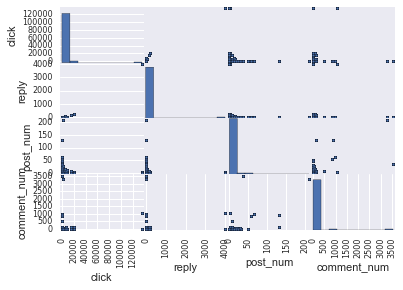

NameError: name 'pandas' is not defined

In [185]:
from pandas.tools import plotting

#fig = plt.figure(figsize=(10, 10))
plotting.scatter_matrix(data[['click', 'reply', 'post_num','comment_num']]) 
plt.show()
dir(pandas.tools)

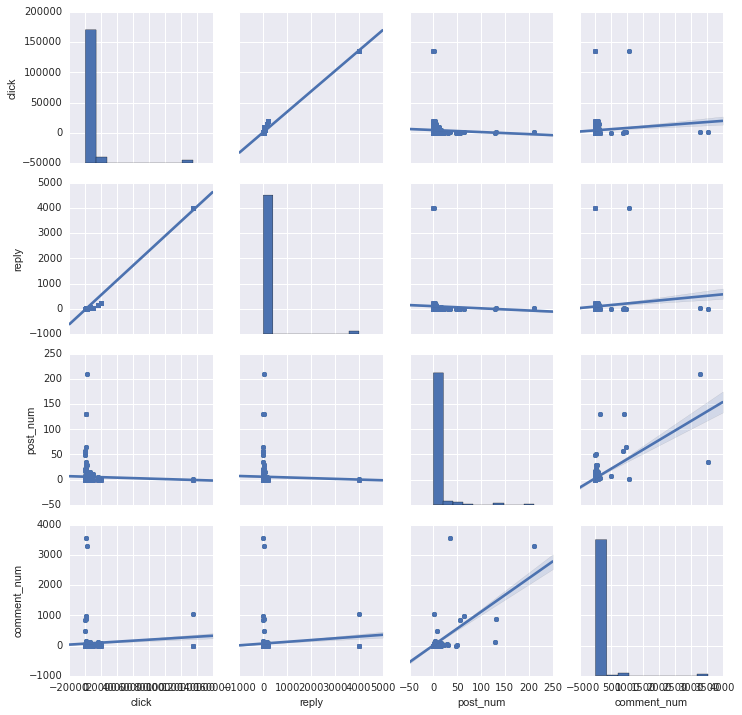

In [186]:
import seaborn 
seaborn.pairplot(data, vars=['click', 'reply', 'post_num', 'comment_num'],
                  kind='reg') 

### 分析：从上面图中可以看出点击量和回贴数有比较强的线性关系，用户发贴数量和评论数量有较强的线性关系。

In [187]:
date = map(lambda x: x[:10], data.time)
data['date'] = pd.to_datetime(date)

In [188]:
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day

In [189]:
data.describe()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000
mean,4349.220000,97.360000,0.492267,1.578533,5.685867,70.623200,6.60000,2015.580000,15.640000
std,18995.687102,558.262039,2.320803,5.957698,22.590707,387.346125,3.60024,0.493591,8.881493
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,2015.000000,1.000000
25%,175.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.00000,2015.000000,7.000000
50%,483.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.00000,2016.000000,16.500000
75%,1208.000000,22.000000,0.000000,0.000000,1.000000,0.000000,10.00000,2016.000000,23.000000
max,134741.000000,3996.000000,16.000000,58.000000,210.000000,3542.000000,12.00000,2016.000000,30.000000


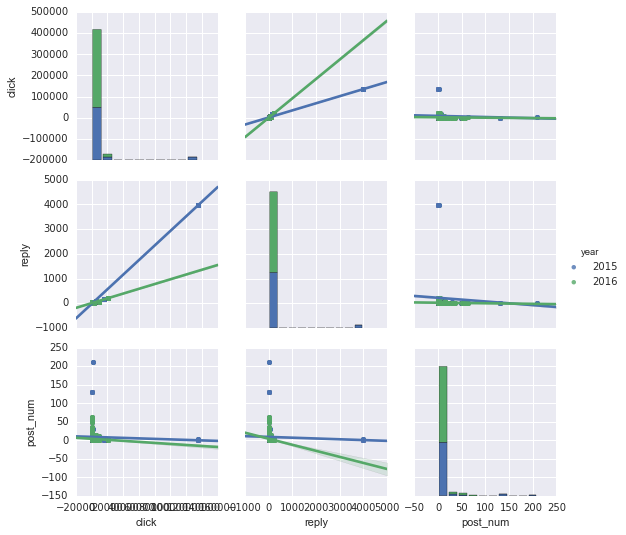

In [190]:
seaborn.pairplot(data, vars=['click', 'reply', 'post_num'],
                 kind='reg', hue='year')  

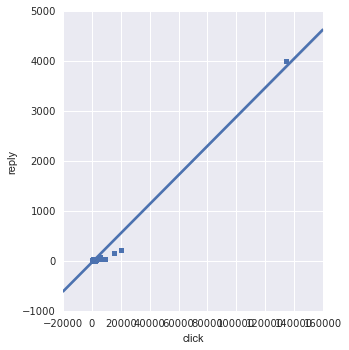

In [99]:
seaborn.lmplot(y='reply', x='click', data=data)  

### 2）时间维度分析：月份作为维度

In [102]:
data.month.value_counts() 

10    1500
6     1050
5      900
1      750
12     750
3      600
2      600
9      600
11     300
4      300
7      150
Name: month, dtype: int64

In [103]:
d = data.month.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
dd

,month
1,750
2,600
3,600
4,300
5,900
6,1050
7,150
9,600
10,1500
11,300


In [104]:
dd.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12], dtype='int64')

In [105]:
dd_date_str = map(lambda x: str(x) +'-01-01', dd.index)
dd_date_str

['1-01-01',
 '2-01-01',
 '3-01-01',
 '4-01-01',
 '5-01-01',
 '6-01-01',
 '7-01-01',
 '9-01-01',
 '10-01-01',
 '11-01-01',
 '12-01-01']

In [106]:
dd_date = pd.to_datetime(dd_date_str)
dd_date

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-09-01',
               '2001-10-01', '2001-11-01', '2001-12-01'],
              dtype='datetime64[ns]', freq=None)

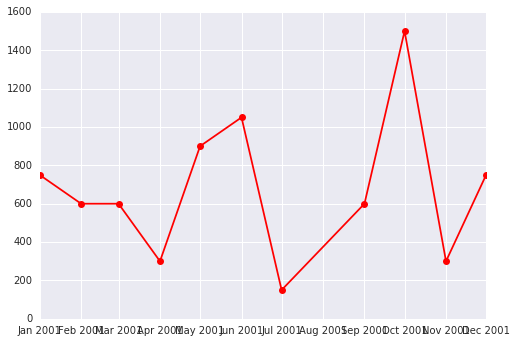

In [108]:
plt.plot(dd_date, dd.month, 'r-o')
plt.show()

### 分析：时间趋势，五六月和十、十一月是讨论EXO的高峰期。

In [109]:
ds = dd.cumsum()
ds

,month
1,750
2,1350
3,1950
4,2250
5,3150
6,4200
7,4350
9,4950
10,6450
11,6750


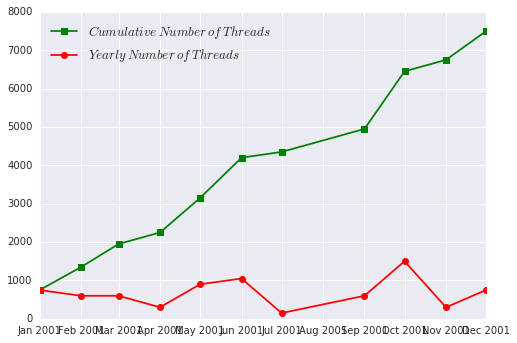

In [110]:
d = data.month.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

plt.plot(ds.date, ds.month, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')#ds_date#
plt.plot(dd.date, dd.month, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

In [112]:
data.groupby('month')['click'].sum()

month
1      1826700
2       406050
3       112050
4        62400
5      1693350
6      3379050
7        19350
9     21689250
10     2869950
11      141000
12      420000
Name: click, dtype: int64

In [113]:
data.groupby('month')['click'].mean()

month
1      2435.600000
2       676.750000
3       186.750000
4       208.000000
5      1881.500000
6      3218.142857
7       129.000000
9     36148.750000
10     1913.300000
11      470.000000
12      560.000000
Name: click, dtype: float64

### 分析: 尽管9月帖子的数量并不算高，但从总点击量和平均点击量来看，却是最高的。由此可以看出9月也同样是论坛用户参与EXO主帖讨论参与度较高的月份。

In [115]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [116]:
df['repost'] = repost

In [117]:
df.groupby('repost').sum()

,click,reply
repost,,
0,32445000,729000
1,174150,1200


### 分析：原创的文章所获的点击量和回复量远高于转载的文章。

In [119]:
dg = data.groupby('month').sum()
dg

,click,reply,year,day
month,,,,
1,1826700,11550,1512000,12450
2,406050,3000,1209600,11850
3,112050,900,1209600,15150
4,62400,600,604800,5550
5,1693350,22650,1814400,14400
6,3379050,41400,2116800,13800
7,19350,150,302400,300
9,21689250,609150,1209000,14700
10,2869950,34200,3022500,15600


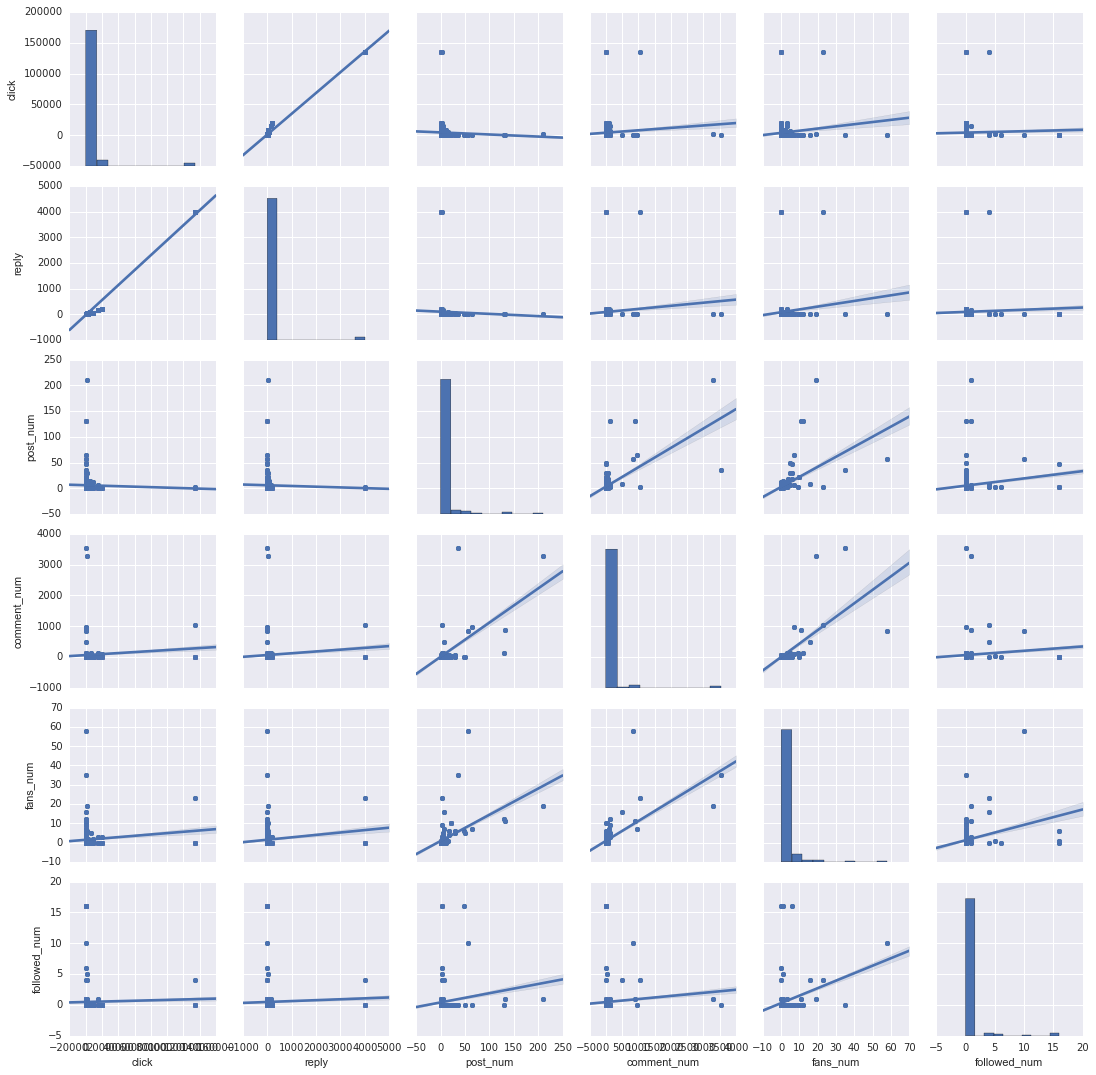

In [191]:
import seaborn 
seaborn.pairplot(data, vars=['click', 'reply', 'post_num', 'comment_num',"fans_num","followed_num"],
                  kind='reg')  

### 分析：在之前的预设中，我们本以为帖子热度（即点击量、回帖数会多）与“用户粉丝数”多的年份有关。但是通过以上作图，我们不难发现，这两者之间并没有明显而直接的关系，反倒只有回帖数之间表现出了明显的线性关系。

In [192]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

dg.date = getDate(dg)

AttributeError: 'DataFrame' object has no attribute 'fans_num'

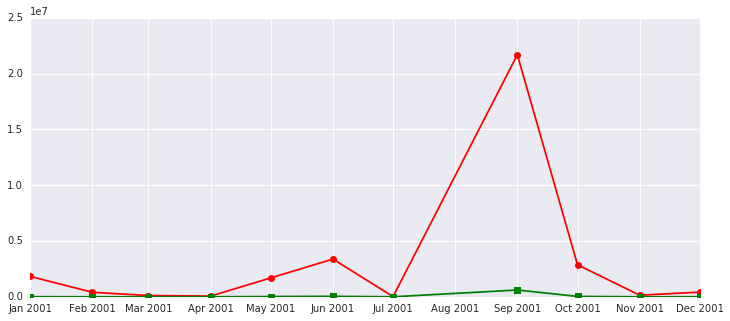

In [193]:
fig = plt.figure(figsize=(12,5))
plt.plot(dg.date, dg.click, 'r-o', label = '$Yearly\:Number\:of\:Clicks$')
plt.plot(dg.date, dg.reply, 'g-s', label = '$Yearly\:Number\:of\:Replies$')
plt.plot(dg.date, dg.fans_num, 'b->', label = '$Yearly\:Number\:of\:Fans$')

plt.yscale('log')

plt.legend(loc=4,numpoints=1,fontsize=13)
plt.show()

### T-test

In [125]:
from scipy import stats
stats.ttest_ind(df['click'], df['repost'])

Ttest_indResult(statistic=19.827913480134548, pvalue=2.1793022415200539e-86)

### Correlation

In [126]:
data.corr()

,click,reply,month,year,day
click,1.000000,0.990978,0.092246,-0.162422,0.225325
reply,0.990978,1.000000,0.097454,-0.166120,0.215084
month,0.092246,0.097454,1.000000,-0.893736,-0.277875
year,-0.162422,-0.166120,-0.893736,1.000000,0.166270
day,0.225325,0.215084,-0.277875,0.166270,1.000000


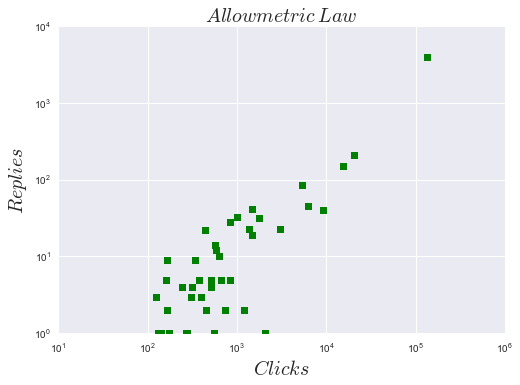

In [127]:
plt.plot(df.click, df.reply, 'gs')
plt.xlabel('$Clicks$', fontsize = 20)
plt.ylabel('$Replies$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('$Allowmetric\,Law$', fontsize = 20)
plt.show()

### 分析：上图阐释了点击量与回复量之间线性关系。 

### Regression

In [128]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [129]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [130]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 02 Jul 2016   Prob (F-statistic):           1.90e-08
Time:                        18:22:55   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [131]:
reg = smf.ols('reply ~ click + followed_num', data=data).fit()

In [132]:
print reg.summary()

                            OLS Regression Results                            
Dep. Variable:                  reply   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.555e+04
Date:                Sat, 02 Jul 2016   Prob (F-statistic):               0.00
Time:                        18:22:55   Log-Likelihood:                -12247.
No. Observations:                2147   AIC:                         2.451e+04
Df Residuals:                    2138   BIC:                         2.456e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            -29.6940      1

In [194]:
reg1 = smf.ols('np.log(reply+1) ~ np.log(click+1) +np.log(followed_num+1)+month', data=data).fit()
print reg1.summary()

                            OLS Regression Results                            
Dep. Variable:      np.log(reply + 1)   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     6744.
Date:                Sat, 02 Jul 2016   Prob (F-statistic):               0.00
Time:                        19:30:30   Log-Likelihood:                -9623.5
No. Observations:                7500   AIC:                         1.925e+04
Df Residuals:                    7496   BIC:                         1.928e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

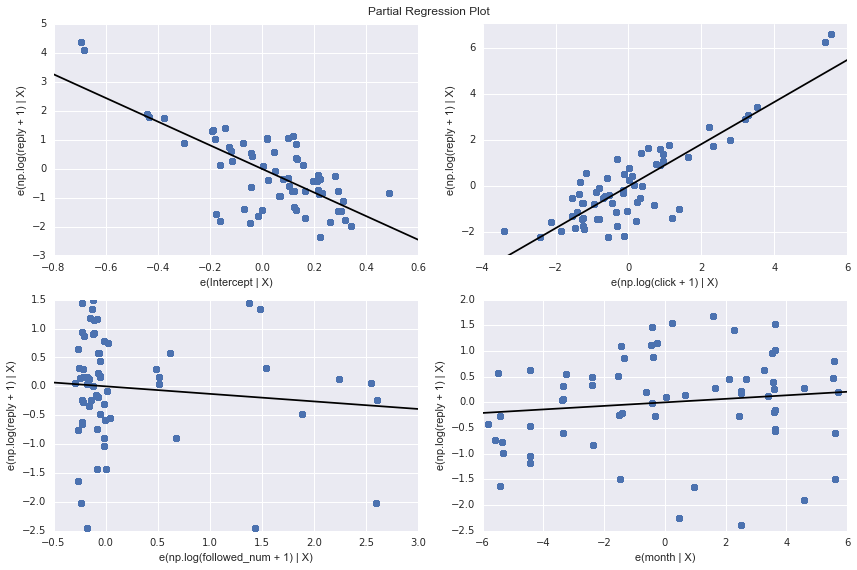

In [195]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg1, fig = fig)
plt.show()

In [196]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car",
                                 cache=True) # load data
data = moore.data
data = data.rename(columns={"partner.status" :
                             "partner_status"}) # make name pythonic

In [197]:
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                 data=data).fit()

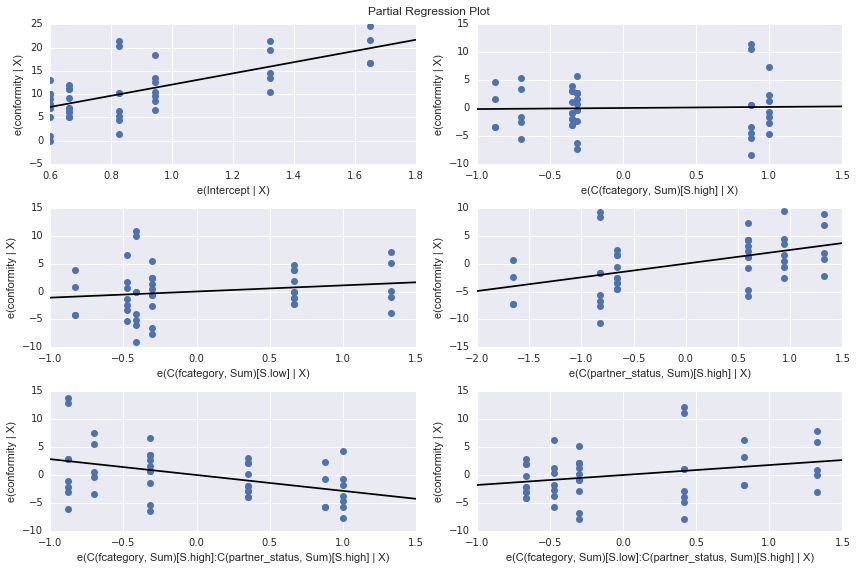

In [198]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(moore_lm, fig = fig)
plt.show()

In [199]:
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print table

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  
